# Image Classification by MLP - Fashion MNIST

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [2]:
from tensorflow.keras.datasets import fashion_mnist

#TODO: load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape

2024-05-19 23:34:54.984861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 23:34:58.227932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(60000, 28, 28)

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

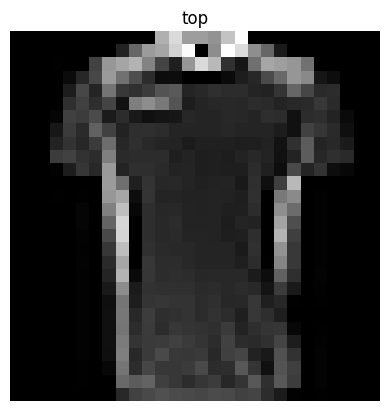

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# np.random.seed(0)

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray')
plt.title(label_class[y_train[idx]])
plt.axis('off')
plt.show()



**Before going further**: what methods could you use to perform such a classification task?

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [13]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Rescale pixel values to the range [0, 1]
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# Reshape the image data
X_train_norm = X_train_norm.reshape(-1, 28*28)
X_test_norm = X_test_norm.reshape(-1, 28*28)

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def my_model(input_dim):
    # Create the Sequential object
    model = Sequential()

    # Add 2 dense layers with 10 neurons each using sigmoid or relu activation
    model.add(Dense(10, activation='relu', input_dim=input_dim))
    model.add(Dense(10, activation='relu'))

    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))

    return model


Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [15]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Build the model
model = my_model(input_dim=X_train_norm.shape[1])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X_train_norm, y_train_cat, epochs=100, batch_size=128)


/home/talha-pervez/detectron2_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-19 23:41:42.591011: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5442 - loss: 1.3296
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8183 - loss: 0.5373
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8342 - loss: 0.4798
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8440 - loss: 0.4457
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8501 - loss: 0.4324
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: 0.4155
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8567 - loss: 0.4105
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8573 - loss: 0.4056
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8587 - loss: 0.3973
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8657 - loss: 0.3869
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8641 - loss: 0.3849
Epoch 12/100
469/469 ━━━━━━━━━━━━━━━━━━━━

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [16]:
# TODO: Compute the accuracy of your model
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat, verbose=0)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat, verbose=0)[1])

2024-05-19 23:45:27.717097: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


accuracy on train with NN: 0.8967666625976562


2024-05-19 23:45:32.196836: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


accuracy on test with NN: 0.8560000061988831


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you can perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)
print('Score with RF on train:', rf.score(X_train_pca, y_train))
print('Score with RF on test:', rf.score(X_test_pca, y_test))


Score with RF on train: 0.9999833333333333
Score with RF on test: 0.8595


Are the performances different? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.